In [23]:
import vdisp_gradient
import vdisp
import numpy as np
from astLib import astCoords
import corner
import matplotlib.pyplot as plt
from start_plot import *
%matplotlib inline


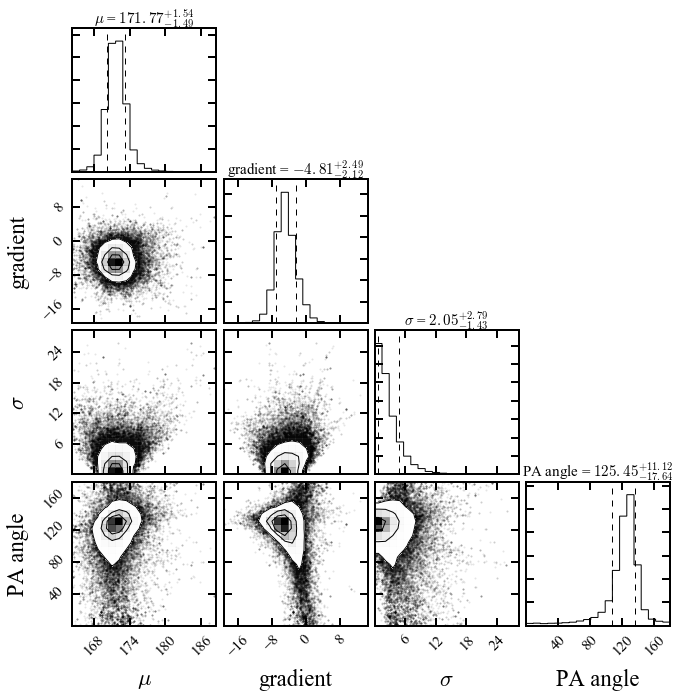

In [19]:
vtbl = np.genfromtxt('leo5_collins.txt', dtype=None, names=True)
vel = vtbl['vr']
vel_err = vtbl['dvr']
ra = vtbl['RA']
dec = vtbl['Dec']
ra0 = astCoords.hms2decimal('11:31:08.8',':')
dec0 = astCoords.dms2decimal('02:13:19.47',':')
out = vdisp_gradient.mcmc(vel, vel_err, ra, dec, ra0, dec0)

samples = np.column_stack((out['mu'], out['gradient'], out['sigma'], out['phi']))

figure = corner.corner(samples,\
                       labels=["$\mu$", "gradient","$\sigma$", "PA angle"],\
                      quantiles=[0.16, 0.84], \
                      show_titles=True, title_kwargs={"fontsize": 15}\
                      )

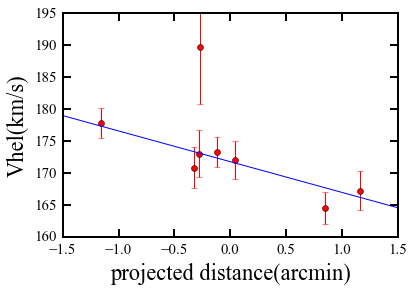

In [20]:
del_ra = (ra - ra0) * np.cos(dec0 * np.pi / 180) * 60.
del_dec = (dec - dec0) * 60.
t = np.median(out['phi'])
x = del_ra * np.sin(t * np.pi / 180) + del_dec * np.cos(t * np.pi / 180)
plt.errorbar(x, vel, yerr=vel_err, fmt ='o', color='r')
plt.ylabel('Vhel(km/s)')
plt.xlabel('projected distance(arcmin)')
plt.ylim(160,195)

m = np.median(out['gradient'])
b = np.median(out['mu'])
plt.plot(np.linspace(-1.5,1.5,100), m*np.linspace(-1.5,1.5,100) + b)
plt.show()

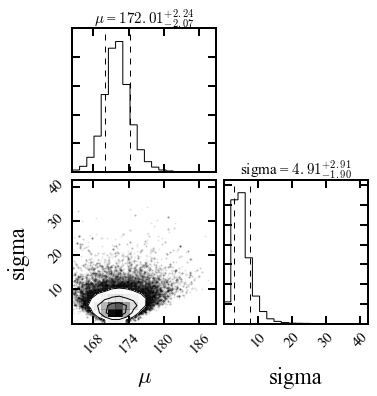

In [25]:
out_2para = vdisp.mcmc(vel, vel_err)

samples = np.column_stack((out_2para['mu'], out_2para['sigma']))

figure = corner.corner(samples,\
                       labels=["$\mu$", "sigma"],\
                      quantiles=[0.16, 0.84], \
                      show_titles=True, title_kwargs={"fontsize": 15}
                      )


In [43]:
params1 = (np.median(out['gradient']), np.median(out['mu']), np.median(out['sigma']), np.median(out['phi']))
print '4 parameter fit Ln likelihood: ', vdisp_gradient.lnprob(params1, vel, vel_err, del_ra, del_dec)
m = np.median(out['gradient'])
b = np.median(out['mu'])
s = np.median(out['sigma'])
sigma2 = s**2 + vel_err**2 
model = m*x + b
print '4 parameter fit chisq: ', np.sum((vel-model)**2 / sigma2)
print '4 parameter fit reduced chisq: ', np.sum((vel-model)**2 / sigma2) / ((len(vel)-4))

params2 = (np.median(out_2para['mu']), np.median(out_2para['sigma']))
print '2 parameter fit Ln likelihood: ', vdisp.lnprob(params2, vel, vel_err)
print '2 parameter fit chisq: ', np.sum((vel - np.median(out_2para['mu']))**2/(vel_err**2 + np.median(out_2para['sigma'])**2))
print '2 parameter fit reduced chisq: ', np.sum((vel - np.median(out_2para['mu']))**2/(vel_err**2 + np.median(out_2para['sigma']**2)))/(len(vel)-2)

4 parameter fit Ln likelihood:  -20.8212797143
4 parameter fit chisq:  4.89378336619
4 parameter fit reduced chisq:  1.22344584155
2 parameter fit Ln likelihood:  -25.2678537046
2 parameter fit chisq:  6.82399290746
2 parameter fit reduced chisq:  1.13733215097
